In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, save_model, load_model

In [24]:
# Loading Models
SubjectIDModelPath = '/content/SubjectIDModel.hdf5'
SubjectIDModel = load_model(SubjectIDModelPath, compile = True)
FingerNumberModelPath = '/content/FingerNumberModel.hdf5'
FingerNumberModel = load_model(FingerNumberModelPath, compile = True)

Infomation confirm! Fingerprint matches: person Id 108 left index


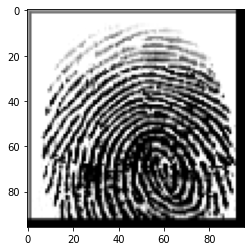

In [28]:
# Reading input file
img_path = '/content/datasets_38300_58521_SOCOFing_Real_108__M_Left_index_finger.dib'
img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img_size = 96
img_resize = cv2.resize(img_array, (img_size, img_size))

def show_fingername(fingernum):
    if fingernum>=5:
        fingername = "right "
        fingernum -= 5
    else: fingername = "left "
    if fingernum==0:
        fingername += "little"
    elif fingernum==1:
        fingername += "ring"
    elif fingernum==2:
        fingername += "middle"
    elif fingernum==3:
        fingername += "index"
    else: fingername += "thumb"
    return fingername

# Changing size of image
X_test = np.array(img_resize).reshape(-1, img_size, img_size, 1)
X_test = X_test / 255.0
plt.imshow(X_test.reshape((96, 96)), cmap ='gray')

# Prediction
y_SubjectID_pred = SubjectIDModel.predict(X_test)
y_fingerNum_pred = FingerNumberModel.predict(X_test)

Id_pred = np.argmax(y_SubjectID_pred)
fingerNum_pred = np.argmax(y_fingerNum_pred)

print("Infomation confirm! Fingerprint matches: person Id",Id_pred+1, show_fingername(fingerNum_pred)) # +1 because model prediction starting from 0 index